In [12]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(10,6)

In [10]:
df =pd.read_csv('D:\\Programming\\Python\\py-master\\ML\\FeatureEngineering\\2_outliers_z_score\\heights.csv')
df.sample(5)

,gender,height
6472,Female,59.481420
5324,Female,66.640692
1191,Male,70.064688
782,Male,71.162992
5425,Female,61.236988


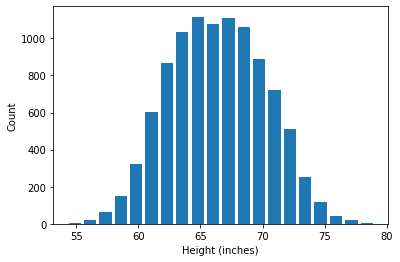

In [11]:
plt.hist(df['height'],bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

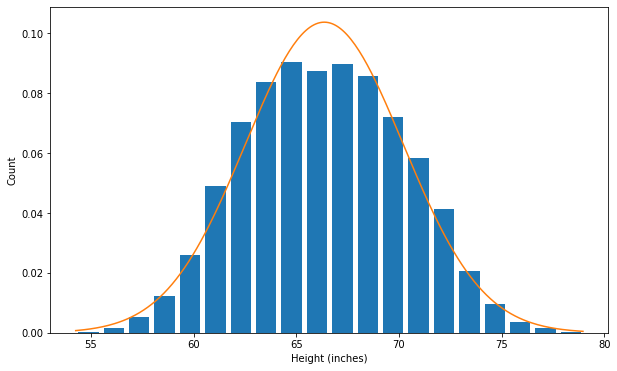

In [13]:
from scipy.stats import norm
plt.hist(df['height'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng=np.arange(df['height'].min(), df['height'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['height'].mean(),df['height'].std()))

In [14]:
upper_limit=df['height'].mean()+3*df['height'].std()
upper_limit

77.91014411725271

In [15]:
lower_limit=df['height'].mean()-3*df['height'].std()
lower_limit


54.824975392479274

In [16]:
df[(df['height']>upper_limit)|(df['height']<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [18]:
df_no_outlier_std_dev=df[(df['height']<upper_limit)&(df['height']>lower_limit)]

In [19]:
df.shape[0]-df_no_outlier_std_dev.shape[0]

7

We removed 7 outliers

# Now using z-score

In [24]:
df['zscore']=(df['height']-df['height'].mean())/df['height'].std()

In [22]:
df.head()

,gender,height,zsore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [25]:
df[df['zscore']>3]

,gender,height,zsore,zscore
994,Male,78.095867,3.048271,3.048271
1317,Male,78.462053,3.143445,3.143445
2014,Male,78.998742,3.282934,3.282934
3285,Male,78.528210,3.160640,3.160640
3757,Male,78.621374,3.184854,3.184854


In [27]:
df[df['zscore']<-3]

,gender,height,zsore,zscore
6624,Female,54.616858,-3.054091,-3.054091
9285,Female,54.263133,-3.146027,-3.146027


In [28]:
df[(df['zscore']>3)|(df['zscore']<-3)]

,gender,height,zsore,zscore
994,Male,78.095867,3.048271,3.048271
1317,Male,78.462053,3.143445,3.143445
2014,Male,78.998742,3.282934,3.282934
3285,Male,78.528210,3.160640,3.160640
3757,Male,78.621374,3.184854,3.184854
6624,Female,54.616858,-3.054091,-3.054091
9285,Female,54.263133,-3.146027,-3.146027


In [31]:
df_no_outliers=df[(df['zscore']>-3)&(df['zscore']<3)]
df_no_outliers.head()

,gender,height,zsore,zscore
0,Male,73.847017,1.943964,1.943964
1,Male,68.781904,0.627505,0.627505
2,Male,74.110105,2.012343,2.012343
3,Male,71.730978,1.393991,1.393991
4,Male,69.881796,0.913375,0.913375


In [32]:
df_no_outliers.shape

(9993, 4)